<a href="https://colab.research.google.com/github/mahin-arvind/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Loading Dataset 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
path = '/content/drive/MyDrive/Datasets/Classification/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
#df = pd.read_excel(path)
df = pd.read_csv(path)

#EDA

##Inspection

In [85]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [86]:
df.drop('id', axis =1, inplace = True)

In [87]:
df.shape

(381109, 11)

In [88]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB
None


##Missing Values

In [90]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing values present in the dataset

##Univariate Analysis

In [91]:
numeric_features = ['Age','Annual_Premium', 'Vintage','Policy_Sales_Channel', 'Region_Code']
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage' ]
cat_boolean_features = ['Driving_License','Previously_Insured', 'Response']
cat_features = cat_label_features + cat_boolean_features

### Numerical Categories

#### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

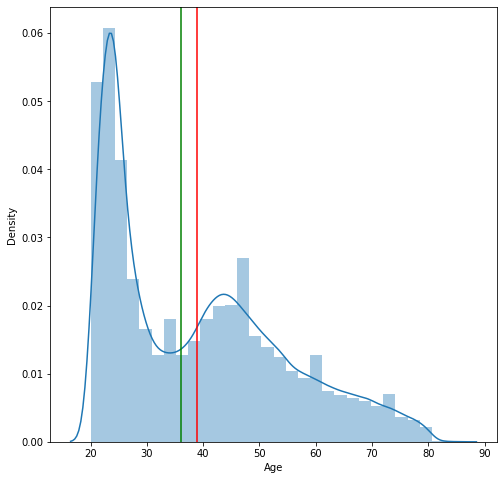

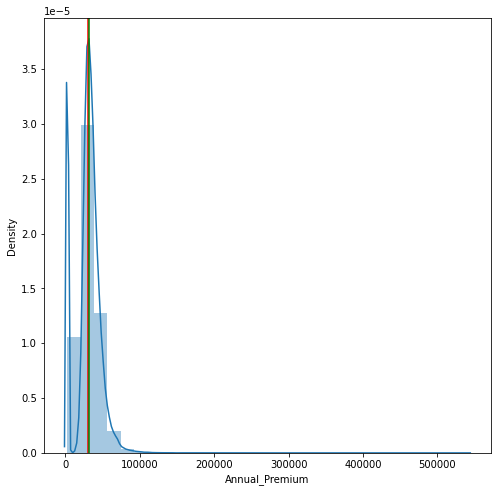

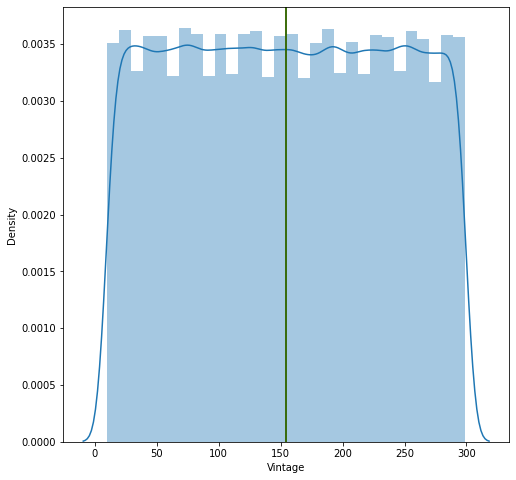

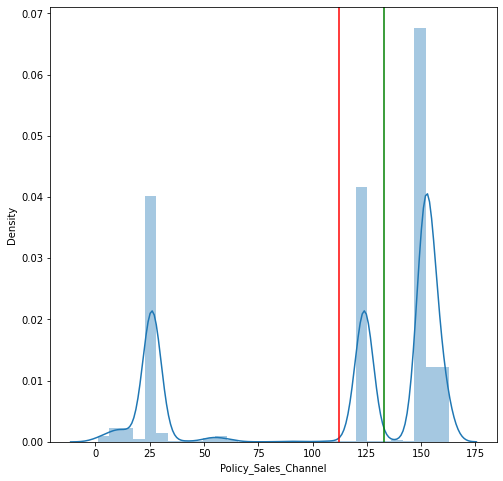

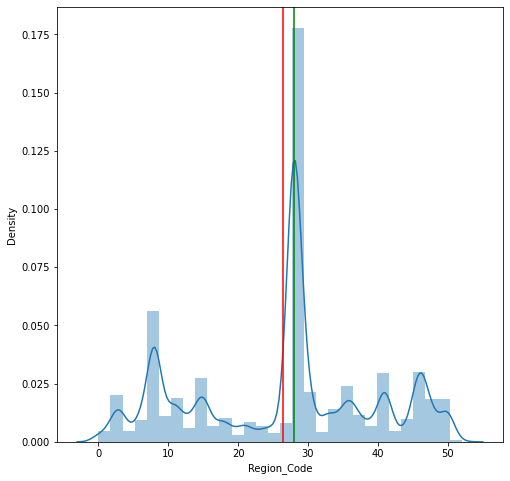

In [92]:
for feature in numeric_features:
  plt.figure(figsize = (8,8))
  sns.distplot(df[feature], bins = 30)
  plt.axvline(x= df[feature].mean(),
              color='red')
  plt.axvline(x= df[feature].median(),
              color='g')


* Policy Channels have high densities in certain range of channels alone. This could indicate there are certain preferred channels for the predominant population. We could consider binning this feature.

* Annual Premium shows normal distribution

* Large number of population are in their early twenty's and mid forty's.

#### Box Plot

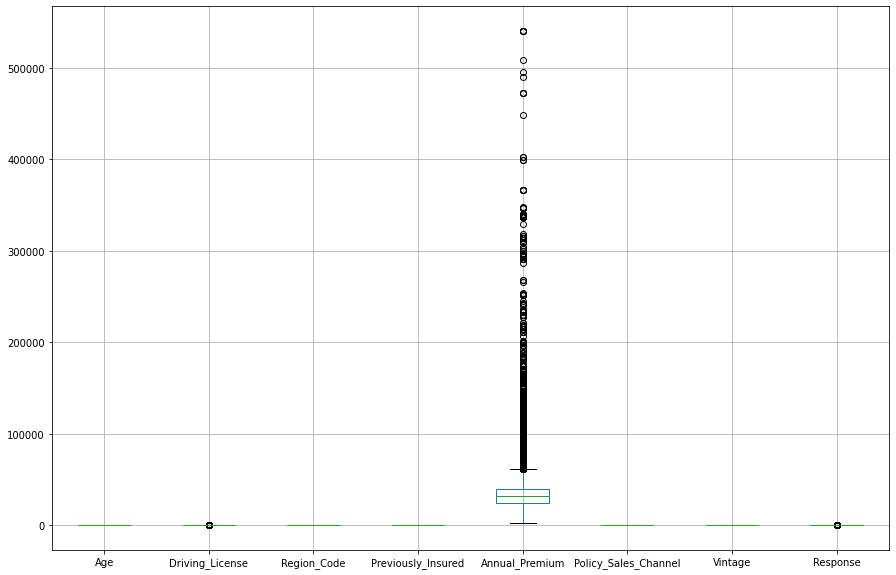

In [93]:
df.boxplot( figsize = (15,10))

Annual Premium has considerable amount of outliers 

###Categorical Columns

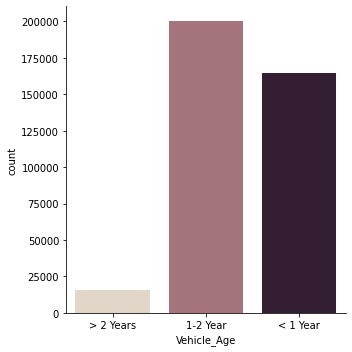

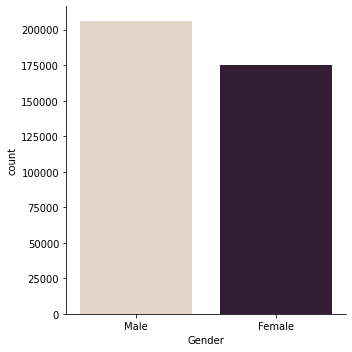

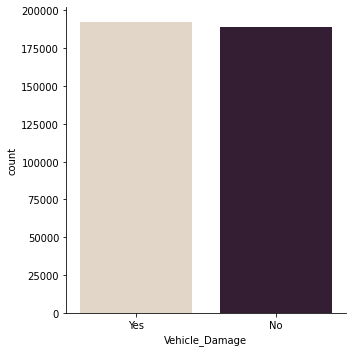

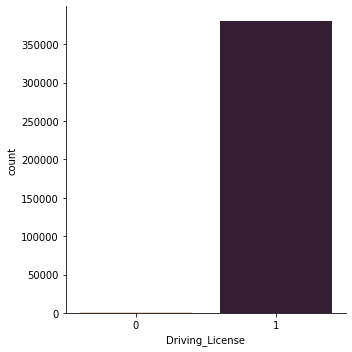

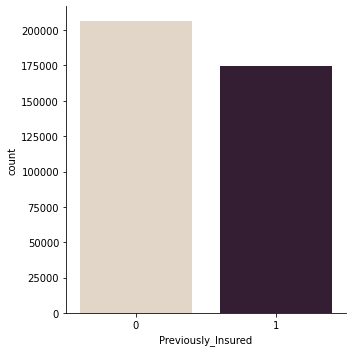

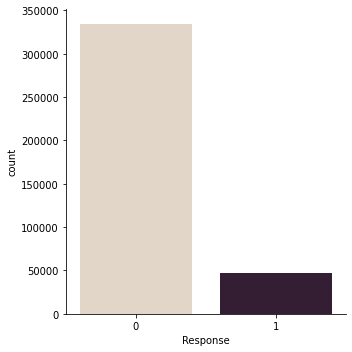

In [94]:
for feature in (cat_label_features + cat_boolean_features  ):
  sns.catplot(x=feature, kind="count", palette="ch:.25", data=df)


* There is a very low ratio of people without driving license which is explained because the data is collected for Vehicle Insurance

* The target i.e responses columns has more negative response than positive responses which explains that the dataset is IMBALANCED.

* Most population's Vehicle Age is in between 0-2 years since most people subscribe their insurances succeeding the purchase of the vehicle

## Bivariate Analysis

### Continuous and Continuous

####Correlation Heatmap

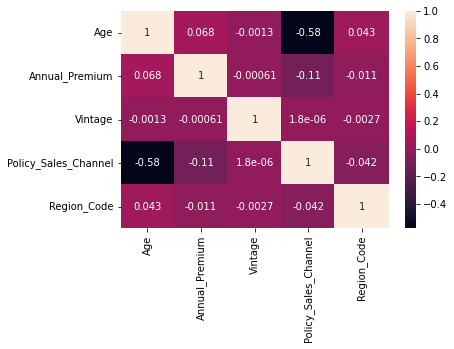

In [95]:
sns.heatmap(df.loc[:,numeric_features].corr(), annot = True)

Age and Policy_sales_channel exhibit correlation of -0.58	

#### Scatter Plot

Age vs Policy Channel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7f90ed504b10>,
 <a list of 83 Text major ticklabel objects>)

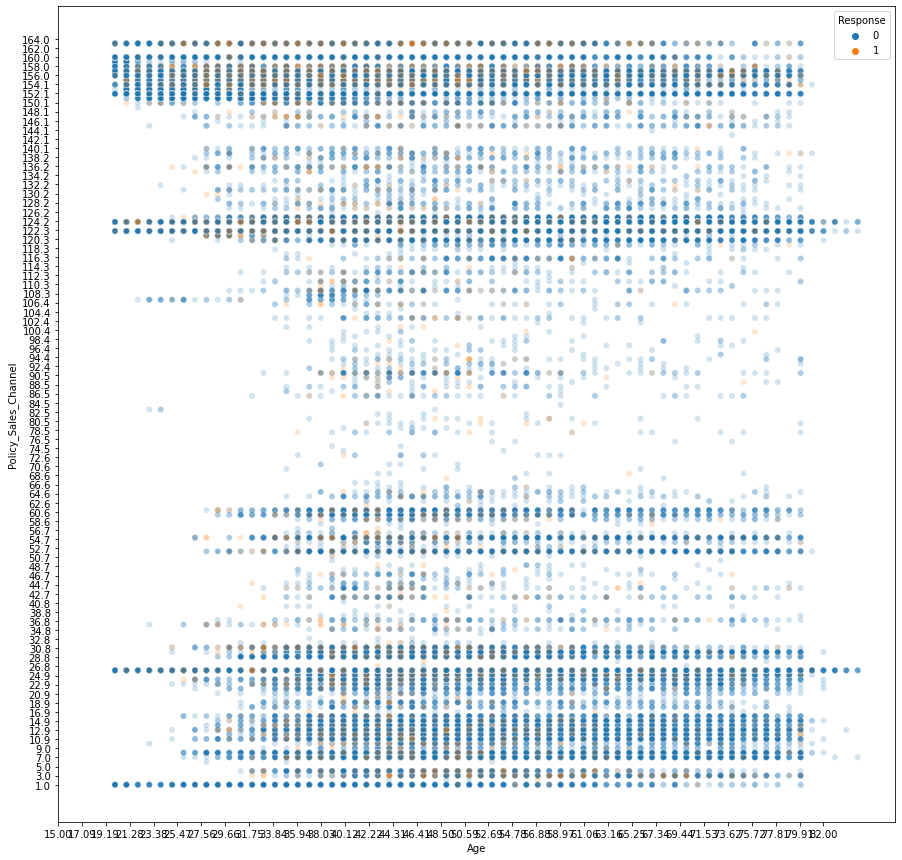

In [96]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Age'],df['Policy_Sales_Channel'],hue = df['Response'],alpha = 0.2)
plt.xticks(ticks = np.linspace(15,82,33))
plt.yticks(ticks = np.linspace(1,164,83))

We can observe that among 155 Policy channels most people prefer channels in certain ranges. From the dense horizontal bars on the graph.

Relationship between annual premium and age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


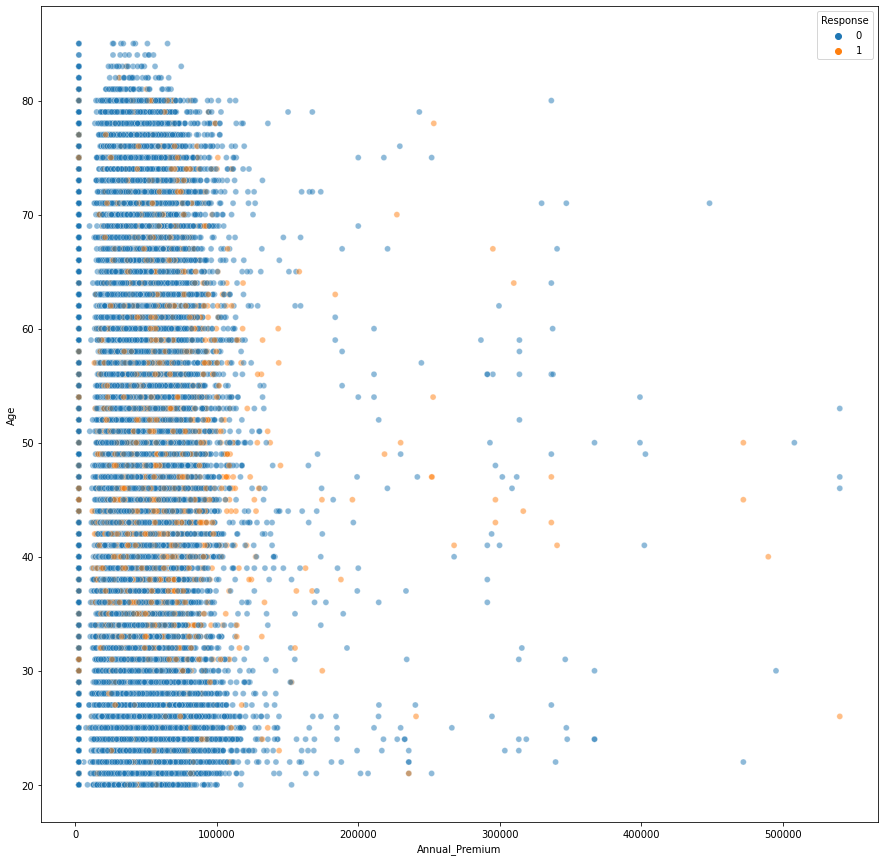

In [97]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Annual_Premium'],df['Age'],hue = df['Response'],alpha = 0.5)


#### VIF

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

VIF              variable
0  5.044031                   Age
1  3.737498        Annual_Premium
2  3.995835               Vintage
3  3.623176  Policy_Sales_Channel
4  4.445521           Region_Code

### Categorical and Categorical

#### Test of Association

In [99]:
pip install researchpy

In [100]:
import researchpy as rp


In [101]:
cat_features

['Vehicle_Age',
 'Gender',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response']

In [102]:
from statsmodels.stats.contingency_tables import Table2x2
catcopy = cat_features.copy()
table = {'feature1':[],
         'feature2':[], 
         'Cramers_V_Score':[], 
         "Interpretation":[]}

for ftr1 in cat_features:
  for ftr2 in catcopy:
    if ftr1 != ftr2:
      crosstab, test_results, expected = rp.crosstab(df[ftr1], df[ftr2],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
      score = (test_results.loc[2, 'results'])
      table['feature1'].append(ftr1)
      table['feature2'].append(ftr2)
      
      table['Cramers_V_Score'].append(score)
      if score > 0.25:
        table['Interpretation'].append("Very Strong")
      elif score > 0.15:
        table['Interpretation'].append("Strong")
      elif score > .1:
        table['Interpretation'].append("Moderate")
      elif score >.05:
        table['Interpretation'].append("Weak")
      else:
        table['Interpretation'].append("None/Very Weak")
  catcopy.remove(ftr1)

table = pd.DataFrame(table)

In [103]:
table[table.Cramers_V_Score > 0.25]

feature1            feature2  Cramers_V_Score Interpretation
1          Vehicle_Age      Vehicle_Damage           0.3969    Very Strong
3          Vehicle_Age  Previously_Insured           0.3809    Very Strong
10      Vehicle_Damage  Previously_Insured           0.8241    Very Strong
11      Vehicle_Damage            Response           0.3544    Very Strong
14  Previously_Insured            Response           0.3412    Very Strong

In [104]:
table[table.Interpretation == 'Strong']

feature1  feature2  Cramers_V_Score Interpretation
0  Vehicle_Age    Gender           0.1668         Strong
4  Vehicle_Age  Response           0.2219         Strong

In [105]:
table[table.Interpretation == 'Moderate']

Empty DataFrame
Columns: [feature1, feature2, Cramers_V_Score, Interpretation]
Index: []

In [106]:
table[table.Interpretation == 'Weak']

feature1            feature2  Cramers_V_Score Interpretation
5   Gender      Vehicle_Damage           0.0916           Weak
7   Gender  Previously_Insured           0.0819           Weak
8   Gender            Response           0.0524           Weak

In [107]:
table[table.Interpretation == "None/Very Weak"]

feature1            feature2  Cramers_V_Score  Interpretation
2       Vehicle_Age     Driving_License           0.0402  None/Very Weak
6            Gender     Driving_License           0.0184  None/Very Weak
9    Vehicle_Damage     Driving_License           0.0166  None/Very Weak
12  Driving_License  Previously_Insured           0.0150  None/Very Weak
13  Driving_License            Response           0.0102  None/Very Weak

Upon Chi Square testing of categorical variables, we observe.

* Vehicle Age has a strong statistical relationships with all features and target.

*Vehicle_Age,Previously_Insured have very strong and Vehicle_Damage have strong relationships with the targer variable

* Driving_License appears to have no or very weak statistical relationship on any other features or the targer

In [108]:
table[table.feature2 == 'Response'].sort_values('Cramers_V_Score', ascending = False)

feature1  feature2  Cramers_V_Score  Interpretation
11      Vehicle_Damage  Response           0.3544     Very Strong
14  Previously_Insured  Response           0.3412     Very Strong
4          Vehicle_Age  Response           0.2219          Strong
8               Gender  Response           0.0524            Weak
13     Driving_License  Response           0.0102  None/Very Weak

### Categorical and Continuous

#### CatPlot

<Figure size 576x576 with 0 Axes>

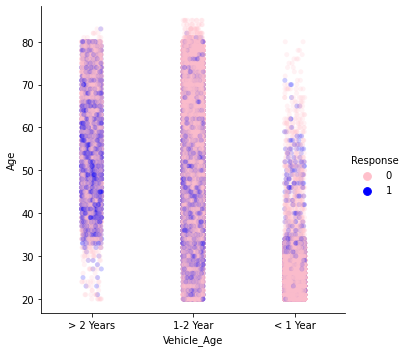

<Figure size 576x576 with 0 Axes>

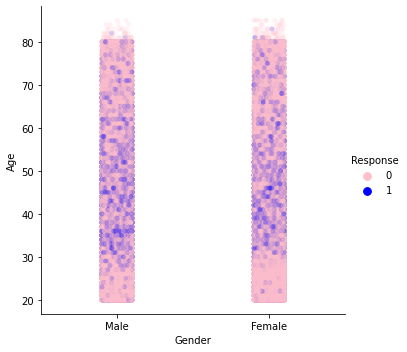

<Figure size 576x576 with 0 Axes>

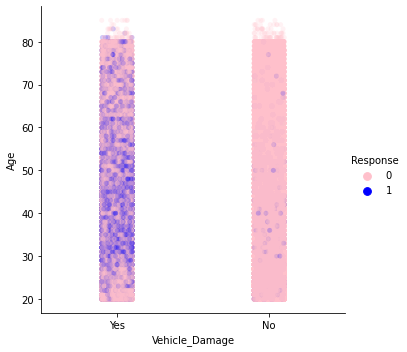

<Figure size 576x576 with 0 Axes>

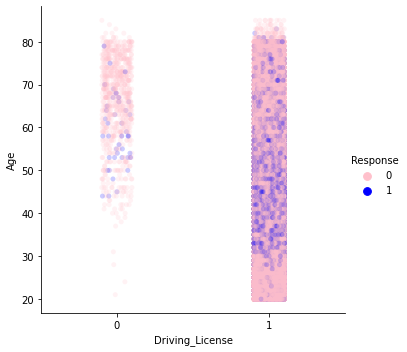

<Figure size 576x576 with 0 Axes>

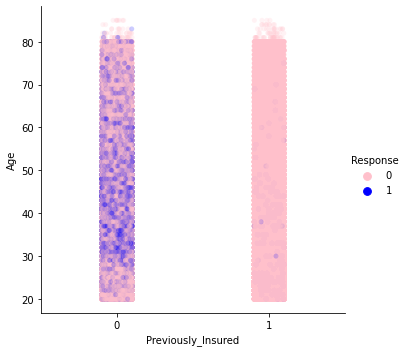

<Figure size 576x576 with 0 Axes>

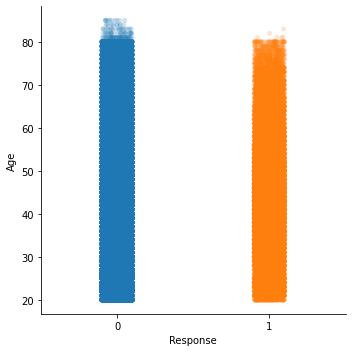

<Figure size 576x576 with 0 Axes>

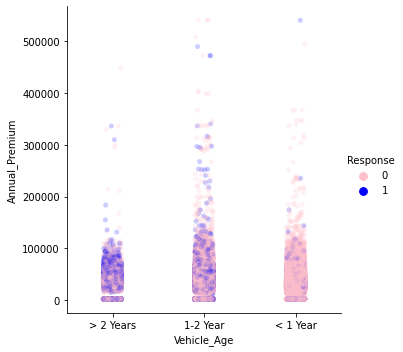

<Figure size 576x576 with 0 Axes>

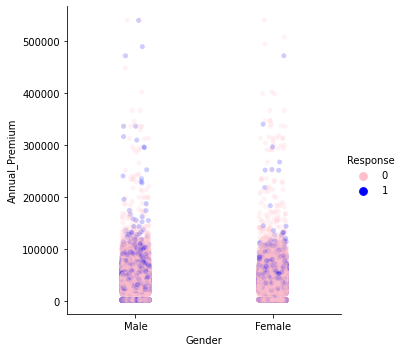

<Figure size 576x576 with 0 Axes>

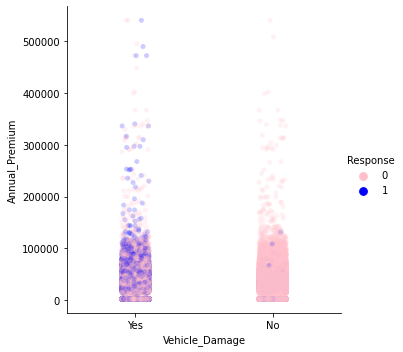

<Figure size 576x576 with 0 Axes>

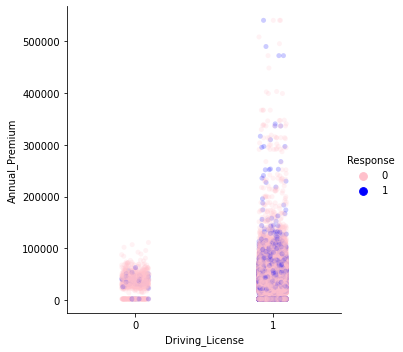

<Figure size 576x576 with 0 Axes>

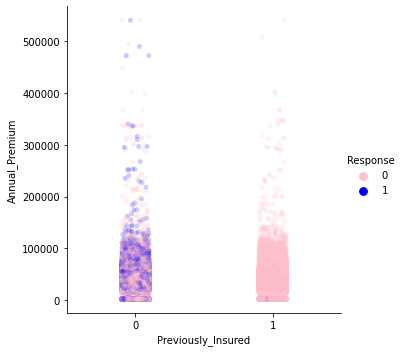

<Figure size 576x576 with 0 Axes>

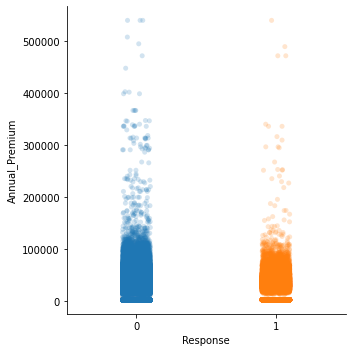

<Figure size 576x576 with 0 Axes>

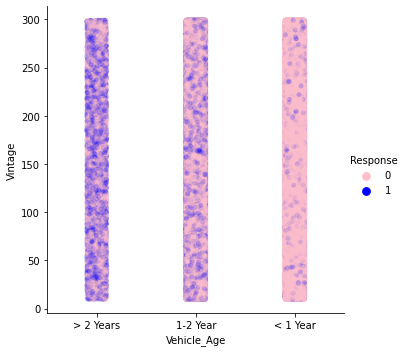

<Figure size 576x576 with 0 Axes>

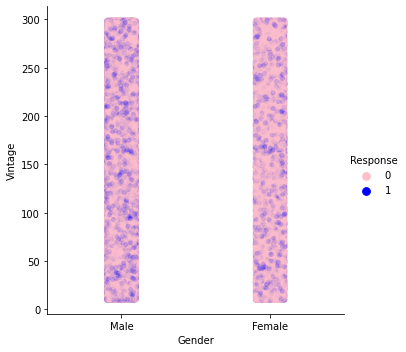

<Figure size 576x576 with 0 Axes>

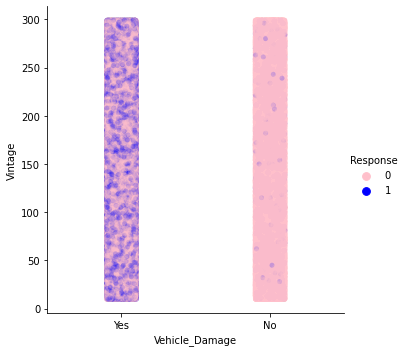

<Figure size 576x576 with 0 Axes>

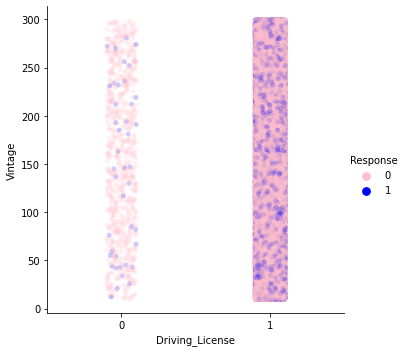

<Figure size 576x576 with 0 Axes>

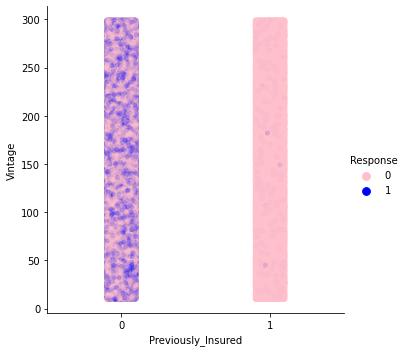

<Figure size 576x576 with 0 Axes>

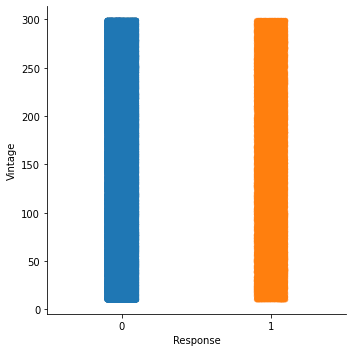

<Figure size 576x576 with 0 Axes>

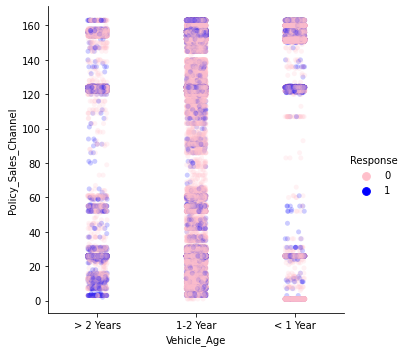

<Figure size 576x576 with 0 Axes>

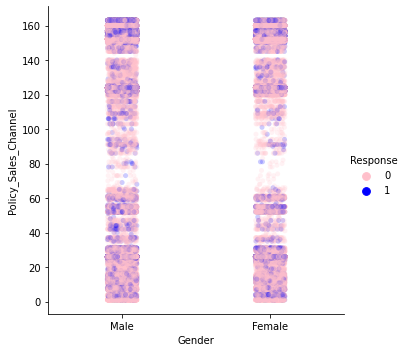

<Figure size 576x576 with 0 Axes>

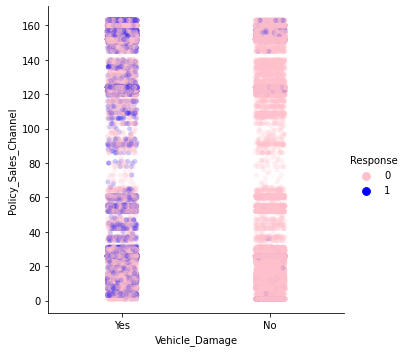

<Figure size 576x576 with 0 Axes>

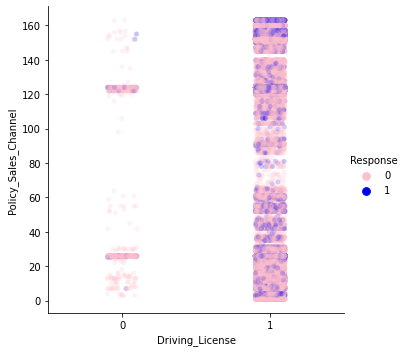

<Figure size 576x576 with 0 Axes>

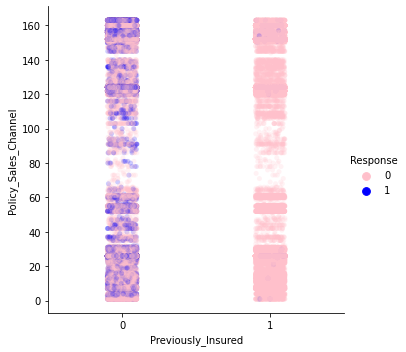

<Figure size 576x576 with 0 Axes>

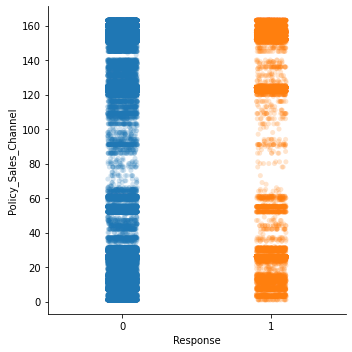

<Figure size 576x576 with 0 Axes>

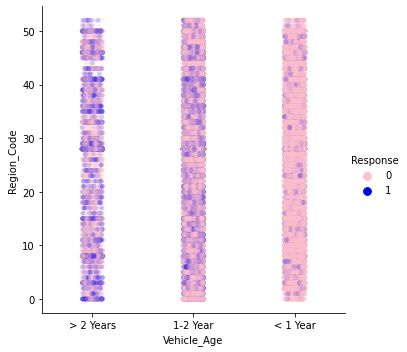

<Figure size 576x576 with 0 Axes>

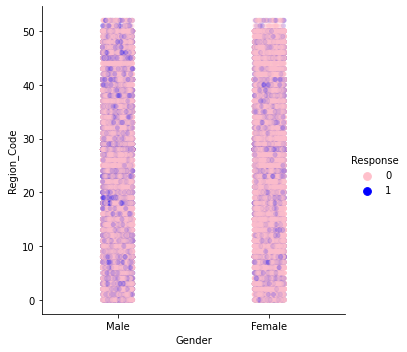

<Figure size 576x576 with 0 Axes>

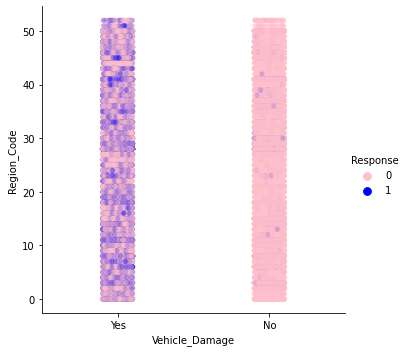

<Figure size 576x576 with 0 Axes>

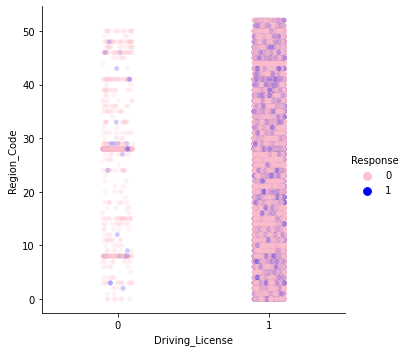

<Figure size 576x576 with 0 Axes>

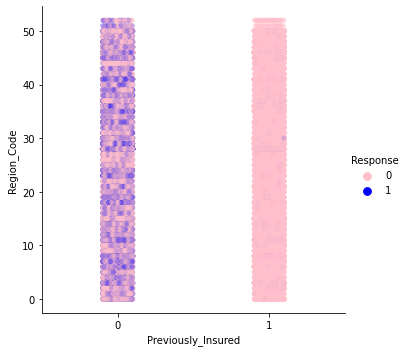

<Figure size 576x576 with 0 Axes>

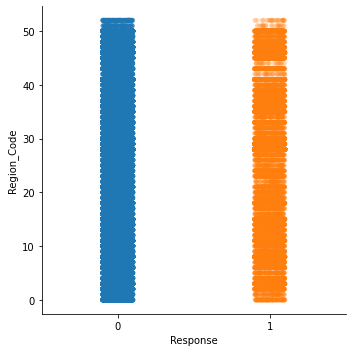

In [109]:
for num in numeric_features:
  for cat in cat_features:
    if cat!= 'Response':
      plt.figure(figsize = (8,8))
      sns.catplot(x=cat, y = num, hue="Response", data= df, alpha = 0.2, palette={0:'pink', 1:'blue' })
    else:
      plt.figure(figsize = (8,8))
      sns.catplot(x=cat, y = num, data= df, alpha = 0.2)
      plt.show()

#### Violin Plot

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compare

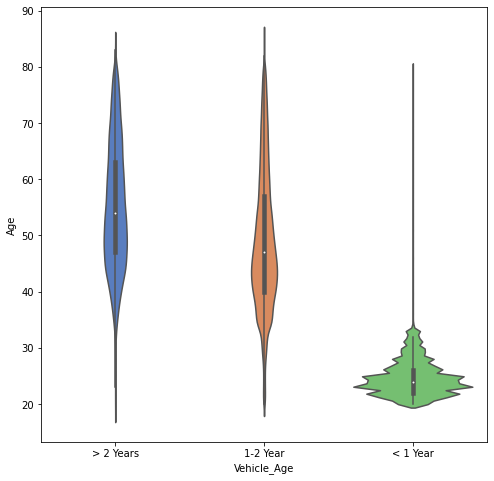

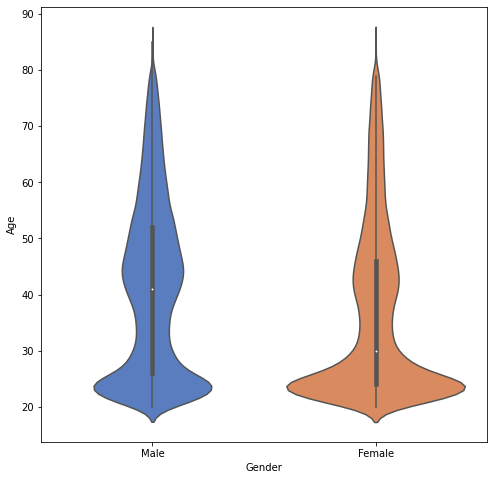

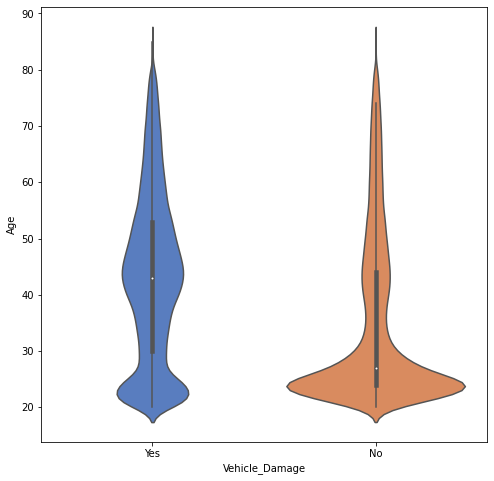

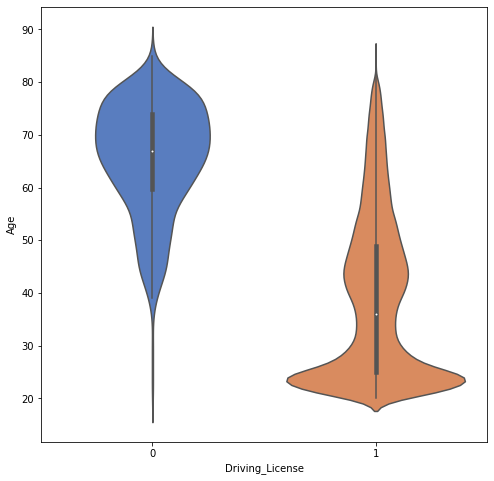

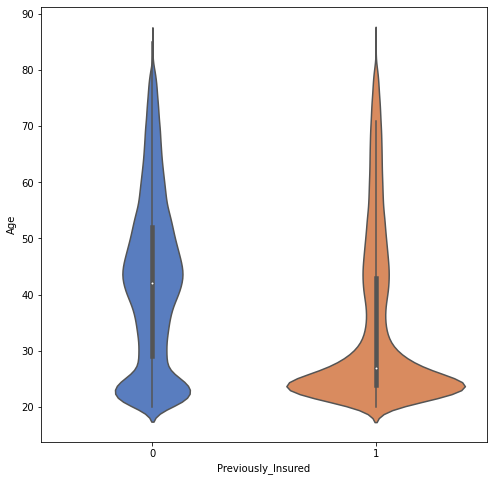

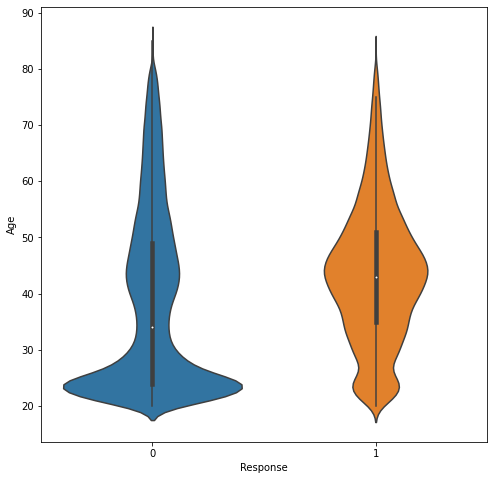

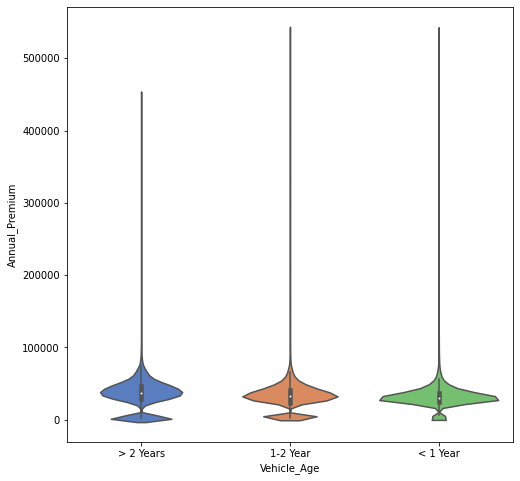

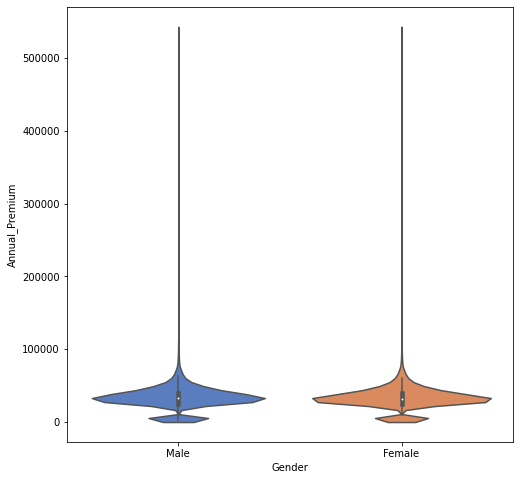

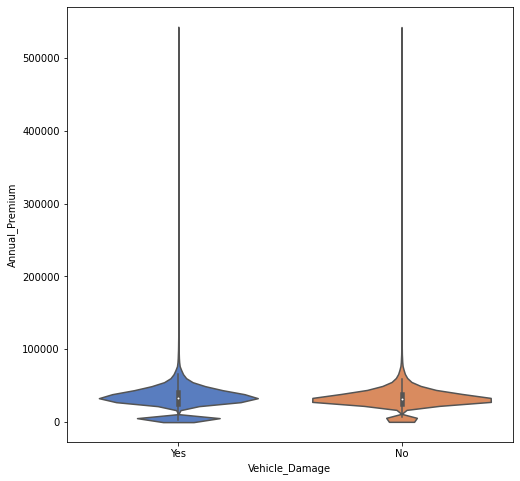

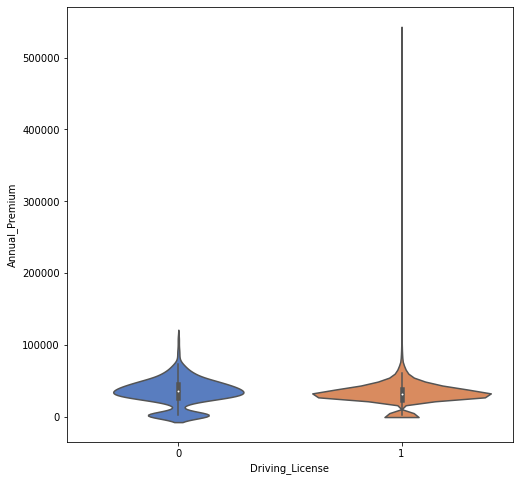

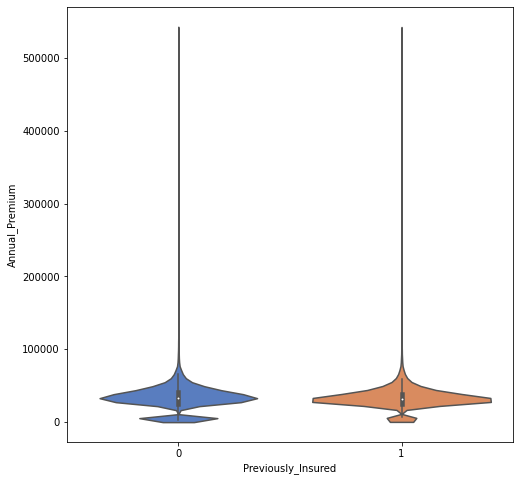

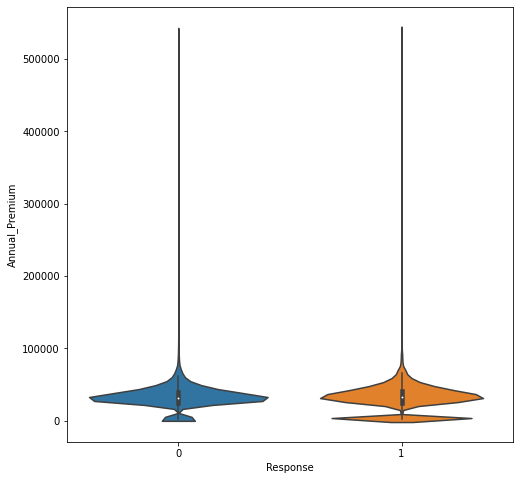

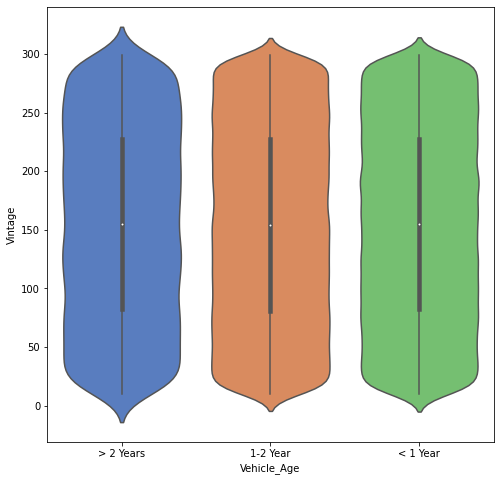

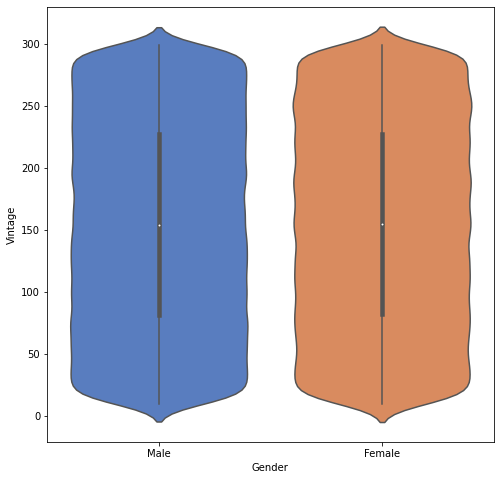

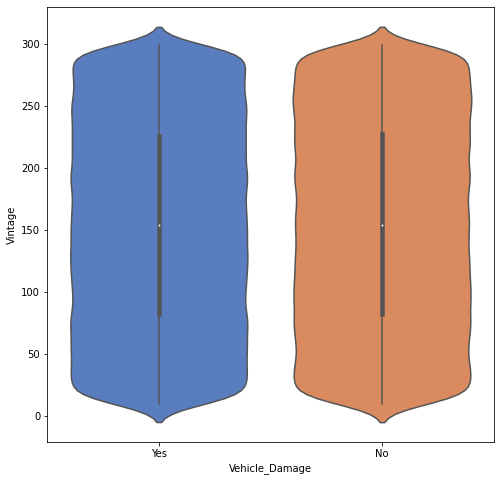

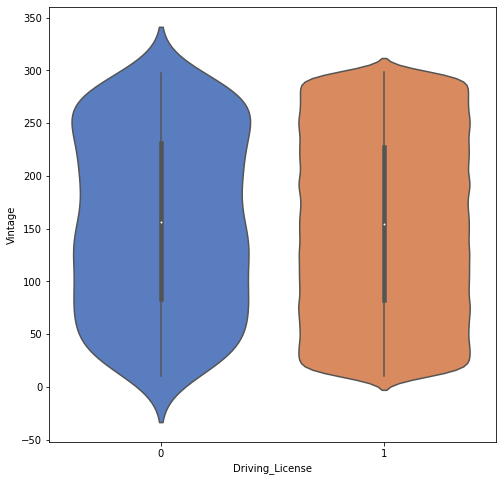

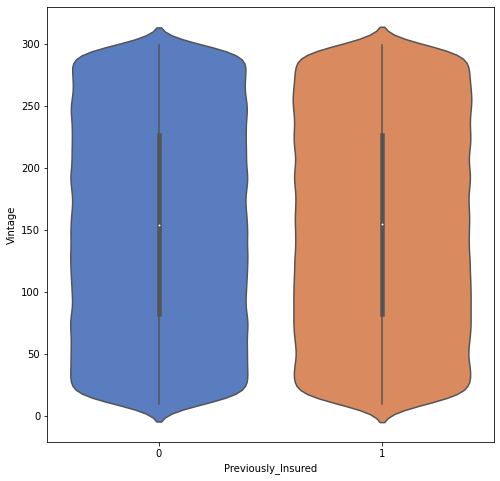

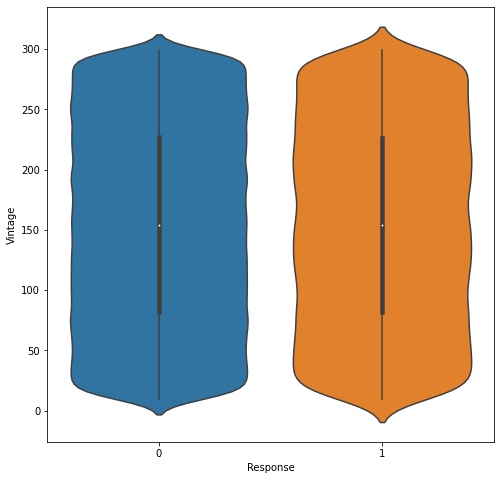

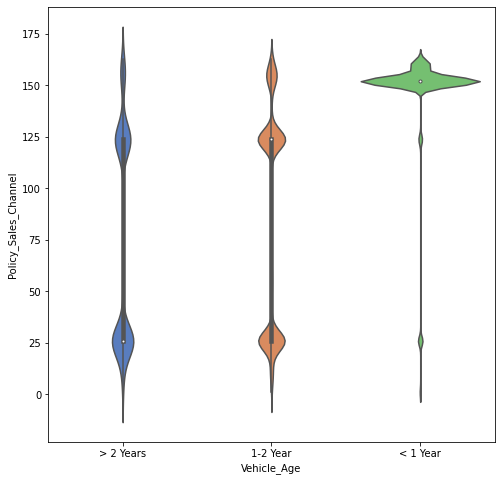

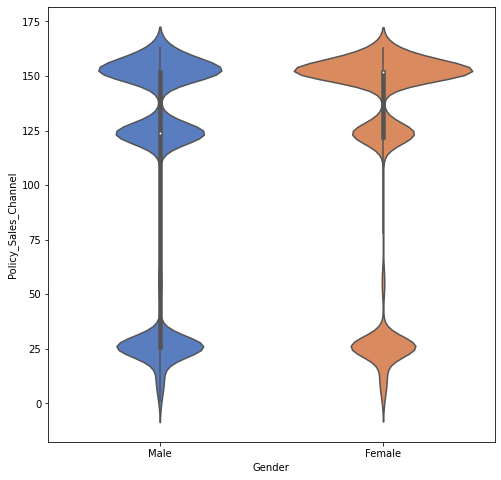

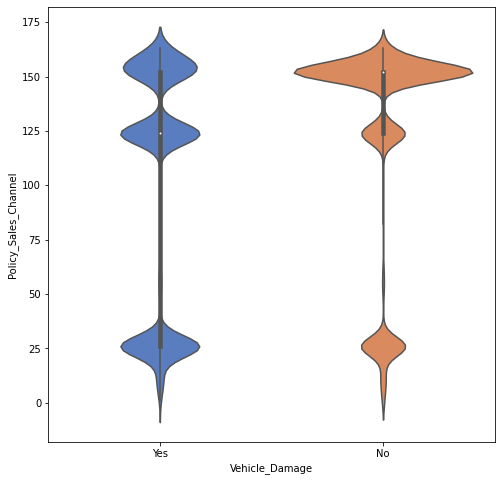

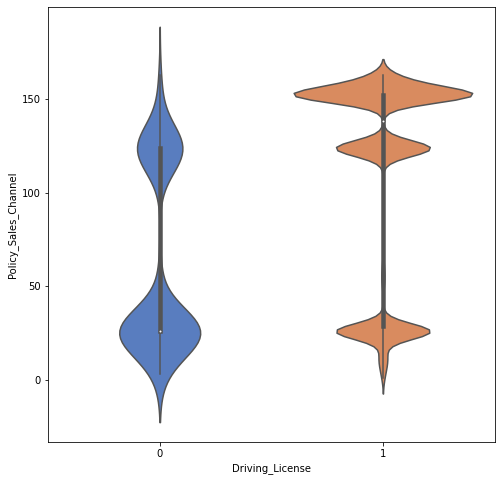

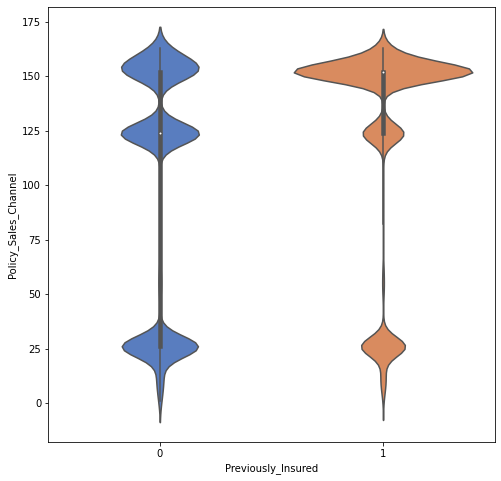

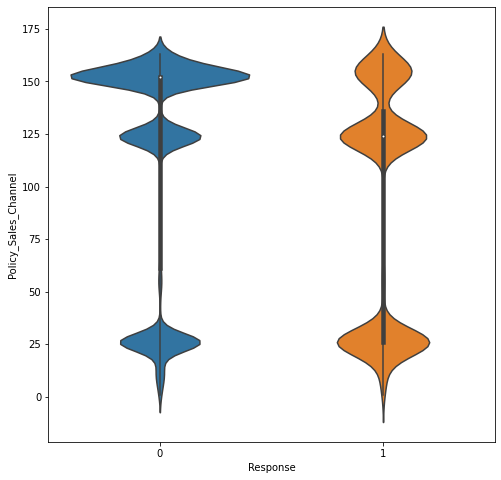

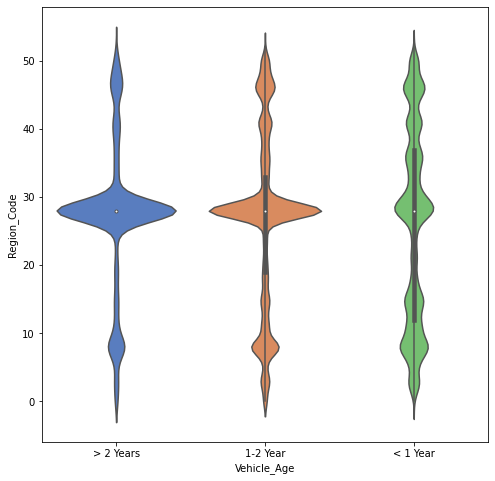

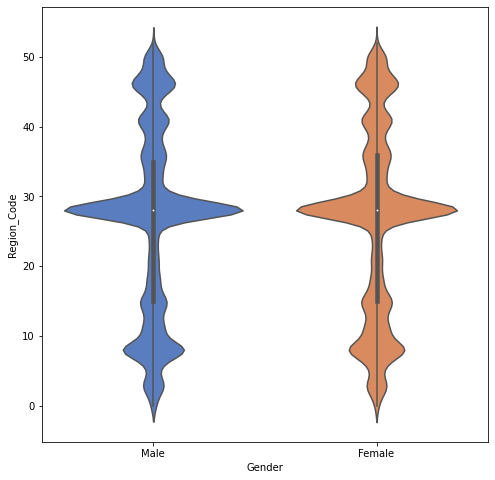

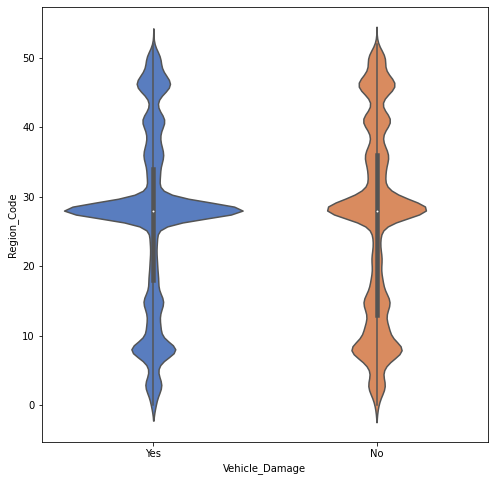

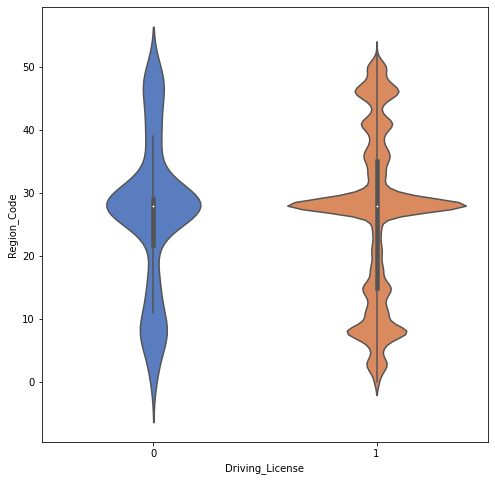

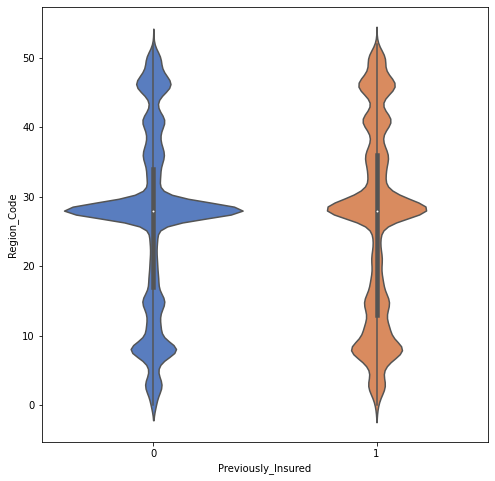

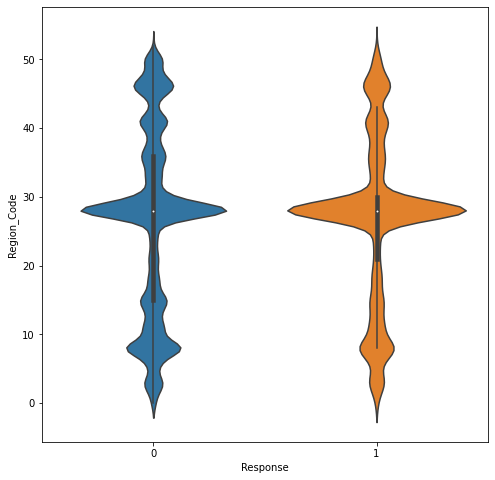

In [110]:
for num in numeric_features:
  for cat in cat_features:
    if cat!= 'Response':
      plt.figure(figsize = (8,8))
      sns.violinplot(x=cat, y = num, data= df, palette = 'muted' )
    else:
      plt.figure(figsize = (8,8))
      sns.violinplot(x=cat, y = num, data= df )
      plt.show()

In the violin plots with policy_sales_channel we can notice that the populations are dense in three specific regions alone regardless of the categories. Given that the nature of the feature is in itself categorical, we can bin this based on its population distribution.

Similarly, Region_Code exhibits this feature. The waves are wider in the same regions. Which could also be binned

#Feature Engineering

## Outlier Treatment

### Numerical Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


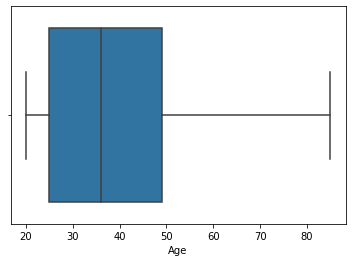

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


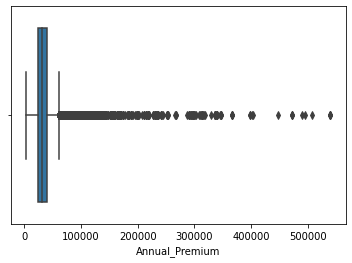

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


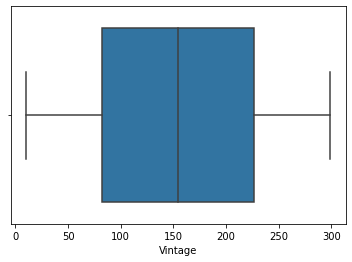

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


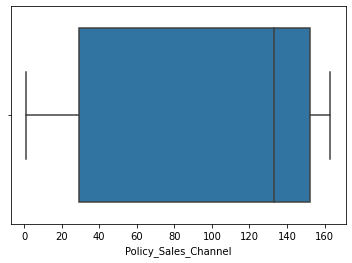

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


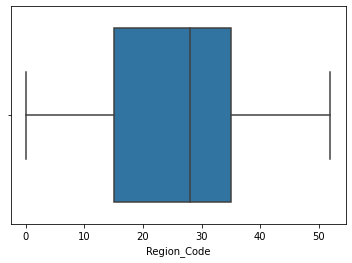

In [111]:
for feature in numeric_features:
  sns.boxplot(df[feature])
  plt.show()

In [112]:
for ftr in numeric_features: 
  print(ftr,'\n')
  q25, q75 = np.percentile(df[ftr], 25), np.percentile(df[ftr], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:
    
    def label(row):
      if row[ftr] > upper: 
        return 1
      if row[ftr] < lower:
        return 1
      else:
        return 0

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]
    
    df[ftr + '_Outlier'] =  df.apply (lambda row: label(row), axis=1)
    df[ftr ] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Age 

Percentiles: 25th=25.000, 75th=49.000, IQR=24.000
Identified outliers: 0

-------

Annual_Premium 

Percentiles: 25th=24405.000, 75th=39400.000, IQR=14995.000
Identified outliers: 10320
Annual_Premium Outliers Removed

-------

Vintage 

Percentiles: 25th=82.000, 75th=227.000, IQR=145.000
Identified outliers: 0

-------

Policy_Sales_Channel 

Percentiles: 25th=29.000, 75th=152.000, IQR=123.000
Identified outliers: 0

-------

Region_Code 

Percentiles: 25th=15.000, 75th=35.000, IQR=20.000
Identified outliers: 0

-------



### Detecting Multicolinearity

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

VIF              variable
0  5.154515                   Age
1  4.221447        Annual_Premium
2  4.004905               Vintage
3  3.669516  Policy_Sales_Channel
4  4.457084           Region_Code

### Binning Numerical Feature into Cat

Policy_Sales_Channel and Region_Code binned Based on Violin Plot Distribution

In [114]:
a = {
    'col': [],
     'item':[],
     'percent':[]
}
for item in df['Policy_Sales_Channel'].unique():
  percent = 100*len(df[df['Policy_Sales_Channel']==item])/df.shape[0]
  a['col'].append('Policy_Sales_Channel')
  a['item'].append(item)
  a['percent'].append(percent)

for item in df['Region_Code'].unique():
  percent = 100*len(df[df['Region_Code']==item])/df.shape[0]
  a['col'].append('Region_Code')
  a['item'].append(item)
  a['percent'].append(percent)

a = pd.DataFrame(a)
pc_table = (a[a.col == 'Policy_Sales_Channel'])
rc_table = (a[a.col == 'Region_Code'])

In [115]:
[len(pc_table),
 len(pc_table[pc_table.percent > 5]),
len(pc_table[pc_table.percent <= 5]),
len(pc_table[pc_table.percent <= 3]),
len(pc_table[pc_table.percent <= 1]) ]

[155, 4, 151, 151, 146]

In [116]:
pc_table[pc_table.percent > 5]

col   item    percent
0  Policy_Sales_Channel   26.0  20.912652
1  Policy_Sales_Channel  152.0  35.366260
2  Policy_Sales_Channel  160.0   5.714638
3  Policy_Sales_Channel  124.0  19.415705

In [117]:
[len(rc_table),
 len(rc_table[rc_table.percent >5 ]),
len(rc_table[rc_table.percent <= 5]),
len(rc_table[rc_table.percent <= 3]),
len(rc_table[rc_table.percent <= 1]),]

[53, 3, 50, 47, 28]

In [118]:
rc_table[rc_table.percent > 5]

col  item    percent
155  Region_Code  28.0  27.922458
165  Region_Code   8.0   8.889058
181  Region_Code  46.0   5.181982

In [119]:
df_dupe = df.copy()
for ftr in ['Policy_Sales_Channel','Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df_dupe[ftr].unique():
    if len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0] < 0.05: #categories with less than 1% occurence are binned together
      print(f"Feature:{ftr} Item:{item}   % Found {len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0]} \n ")
      df_dupe[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

Feature:Policy_Sales_Channel Item:14.0   % Found 0.0016320790115163903 
 
Feature:Policy_Sales_Channel Item:13.0   % Found 0.004893613113308791 
 
Feature:Policy_Sales_Channel Item:30.0   % Found 0.003699728948935869 
 
Feature:Policy_Sales_Channel Item:156.0   % Found 0.0279736243436917 
 
Feature:Policy_Sales_Channel Item:163.0   % Found 0.007591004148419481 
 
Feature:Policy_Sales_Channel Item:157.0   % Found 0.017538289570700246 
 
Feature:Policy_Sales_Channel Item:122.0   % Found 0.026055537916973882 
 
Feature:Policy_Sales_Channel Item:19.0   % Found 0.0005825105153643708 
 
Feature:Policy_Sales_Channel Item:22.0   % Found 0.0008711418518061762 
 
Feature:Policy_Sales_Channel Item:15.0   % Found 0.0023300420614574833 
 
Feature:Policy_Sales_Channel Item:154.0   % Found 0.015725159993597634 
 
Feature:Policy_Sales_Channel Item:16.0   % Found 0.0013723108087187654 
 
Feature:Policy_Sales_Channel Item:52.0   % Found 0.0027682369086009513 
 
Fea

In [120]:
crosstab, test_results, expected = rp.crosstab(df['Policy_Sales_Channel'], df['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

Chi-square test     results
0  Pearson Chi-square ( 154.0) =   26447.0329
1                      p-value =       0.0000
2                   Cramer's V =       0.2634

Policy_Sales_Channel after binning shows very strong association to targer response

In [121]:
crosstab, test_results, expected = rp.crosstab(df['Region_Code'], df['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

Chi-square test    results
0  Pearson Chi-square ( 52.0) =   7267.8425
1                     p-value =      0.0000
2                  Cramer's V =      0.1381

Region_code shows moderate association to target variable

In [122]:
for ftr in ['Policy_Sales_Channel','Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df[ftr].unique():
    if len(df[df[ftr]==item])/df.shape[0] < 0.05: #categories with less than 1% occurence are binned together
      print(f"Feature:{ftr} Item:{item}   % Found {len(df[df[ftr]==item])/df.shape[0]} \n ")
      df[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

Feature:Policy_Sales_Channel Item:14.0   % Found 0.0016320790115163903 
 
Feature:Policy_Sales_Channel Item:13.0   % Found 0.004893613113308791 
 
Feature:Policy_Sales_Channel Item:30.0   % Found 0.003699728948935869 
 
Feature:Policy_Sales_Channel Item:156.0   % Found 0.0279736243436917 
 
Feature:Policy_Sales_Channel Item:163.0   % Found 0.007591004148419481 
 
Feature:Policy_Sales_Channel Item:157.0   % Found 0.017538289570700246 
 
Feature:Policy_Sales_Channel Item:122.0   % Found 0.026055537916973882 
 
Feature:Policy_Sales_Channel Item:19.0   % Found 0.0005825105153643708 
 
Feature:Policy_Sales_Channel Item:22.0   % Found 0.0008711418518061762 
 
Feature:Policy_Sales_Channel Item:15.0   % Found 0.0023300420614574833 
 
Feature:Policy_Sales_Channel Item:154.0   % Found 0.015725159993597634 
 
Feature:Policy_Sales_Channel Item:16.0   % Found 0.0013723108087187654 
 
Feature:Policy_Sales_Channel Item:52.0   % Found 0.0027682369086009513 
 
Fea

In [123]:
df = pd.concat([pd.get_dummies(df['Policy_Sales_Channel'],prefix = 'Policy_Sales_Channel'), df.drop('Policy_Sales_Channel', axis = 1)], axis =1)
df = pd.concat([pd.get_dummies(df['Region_Code'],prefix = 'Region_Code'), df.drop('Region_Code', axis = 1)], axis =1)
df

Region_Code_8.0  Region_Code_28.0  Region_Code_46.0  Region_Code_Rare  \
0                     0                 1                 0                 0   
1                     0                 0                 0                 1   
2                     0                 1                 0                 0   
3                     0                 0                 0                 1   
4                     0                 0                 0                 1   
...                 ...               ...               ...               ...   
381104                0                 0                 0                 1   
381105                0                 0                 0                 1   
381106                0                 0                 0                 1   
381107                0                 0                 0                 1   
381108                0                 0                 0                 1   

        Policy_Sales_Channel_26.0  Policy_Sales_Channel_124.0  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
381104                          1                           0   
381105                          0                           0   
381106                          0                           0   
381107                          0                           1   
381108                          1                           0   

        Policy_Sales_Channel_152.0  Policy_Sales_Channel_160.0  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                1                           0   
4                                1                           0   
...                            ...                         ...   
381104                           0                           0   
381105                           1                           0   
381106                           0                           1   
381107                           0                           0   
381108                           0                           0   

        Policy_Sales_Channel_Rare  Gender  Age  Driving_License  \
0                               0    Male   44                1   
1                               0    Male   76                1   
2                               0    Male   47                1   
3                               0    Male   21                1   
4                               0  Female   29                1   
...                           ...     ...  ...              ...   
381104                          0    Male   74                1   
381105                          0    Male   30                1   
381106                          0    Male   21                1   
381107                          0  Female   68                1   
381108                          0    Male   46                1   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 Years            Yes         40454.0   
1                        0    1-2 Year             No         33536.0   
2                        0   > 2 Years            Yes         38294.0   
3                        1    < 1 Year             No         28619.0   
4                        1    < 1 Year             No         27496.0   
...                    ...         ...            ...             ...   
381104                   1    1-2 Year             No         30170.0   
381105                   1    < 1 Year             No         40016.0   

### Handling Rare Categorical Variables

In [124]:
for ftr in cat_features:
  print(f"--------\nColumn:{ftr} \n")
  for item in df[ftr].unique():
    if len(df[df[ftr]==item])/df.shape[0] < 0.01: #categories with less than 1% occurence are binned together
      print(f"Item:{item}   % Found {len(df[df[ftr]==item])/df.shape[0]} \n ")

--------
Column:Vehicle_Age 

--------
Column:Gender 

--------
Column:Vehicle_Damage 

--------
Column:Driving_License 

Item:0   % Found 0.0021306240471885996 
 
--------
Column:Previously_Insured 

--------
Column:Response 



In [125]:
for ftr in cat_features:
  print(ftr,f"Unique Values: {df[ftr].unique()}\n")

Vehicle_Age Unique Values: ['> 2 Years' '1-2 Year' '< 1 Year']

Gender Unique Values: ['Male' 'Female']

Vehicle_Damage Unique Values: ['Yes' 'No']

Driving_License Unique Values: [1 0]

Previously_Insured Unique Values: [0 1]

Response Unique Values: [1 0]



## Encoding Categorical Features

In [126]:
cat_label_features

['Vehicle_Age', 'Gender', 'Vehicle_Damage']

Encoding Column Vehicle Age ordinally

In [127]:
cleanup_nums = {"Vehicle_Age":    {'> 2 Years':2, '1-2 Year':1, '< 1 Year':0},
                "Gender": {'Male':0, 'Female':1},
                "Vehicle_Damage":{'Yes':1, 'No':0}
                }
df.replace(cleanup_nums, inplace = True)                

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Region_Code_8.0             381109 non-null  uint8  
 1   Region_Code_28.0            381109 non-null  uint8  
 2   Region_Code_46.0            381109 non-null  uint8  
 3   Region_Code_Rare            381109 non-null  uint8  
 4   Policy_Sales_Channel_26.0   381109 non-null  uint8  
 5   Policy_Sales_Channel_124.0  381109 non-null  uint8  
 6   Policy_Sales_Channel_152.0  381109 non-null  uint8  
 7   Policy_Sales_Channel_160.0  381109 non-null  uint8  
 8   Policy_Sales_Channel_Rare   381109 non-null  uint8  
 9   Gender                      381109 non-null  int64  
 10  Age                         381109 non-null  int64  
 11  Driving_License             381109 non-null  int64  
 12  Previously_Insured          381109 non-null  int64  
 13  Vehicle_Age   

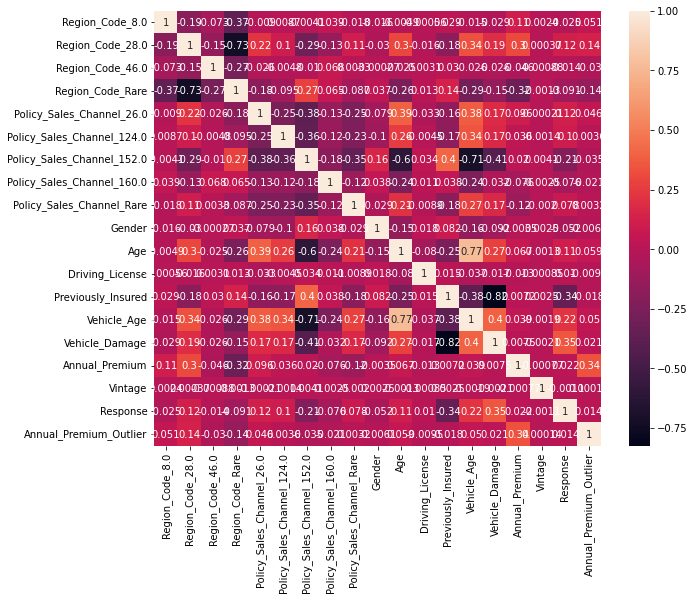

In [129]:
plt.figure(figsize = (10,8
                      ))
sns.heatmap(df.corr(), annot = True)

In [159]:
X, y = df.drop(['Response'],axis=1), df['Response']

In [160]:
X.to_csv('Cleaned_X.csv')
y.to_csv('Cleaned_y.csv')

##Functions

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify = y )

In [165]:
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


### Dimensionality Reduction: PCA

In [207]:
from sklearn.decomposition import PCA
#function to reduce dimension
def do_PCA(X_train,y_train,X_test, y_test, n_components = 13):

  #X_train, y_train, X_test, y_test, n_components

  pca = PCA(n_components)
  pca.fit(X_train, y_train)
  X_train_PCA = pca.transform(X_train)
  X_test_PCA = pca.transform(X_test)

  exp_var_pca = pca.explained_variance_ratio_
  cum_sum_eigenvalues = np.cumsum(exp_var_pca)

  plt.figure(figsize = (10,8))
  plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
  plt.yticks(ticks = np.arange(0,1,0.05))
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  columns = [ f"PCA{i}" for i in np.arange(1,n_components +1,1) ]
  X_train_PCA = pd.DataFrame(X_train_PCA, columns = columns )
  X_test_PCA = pd.DataFrame(X_test_PCA, columns = columns)

  return X_train_PCA, X_test_PCA


### Sampling



In [167]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

def do_sampling(X,y, sample_type, categorical_feature_index = None):
  if sample_type != SMOTENC :
    sampler = sample_type()
  else:
    sampler = sample_type(categorical_features= categorical_feature_index)
  # transform the dataset
  return sampler.fit_resample(X, y)


In [168]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, recall_score , confusion_matrix
from sklearn.metrics import roc_curve, auc, fbeta_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.naive_bayes import  MultinomialNB, BernoulliNB,GaussianNB #do partial fit dirst
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score

In [204]:
report = {
    'Sampling':[],
    'model_name':[],
    'TP':[],
    'FP':[],
    'TN':[],
    'FN':[],
    
    'accuracy':[],
    'balanced_accuracy':[],
    'recall':[],
    'precision':[],
    'f1':[],
    'f0.5':[],
    'f2.0':[]
}
# function to evaluate and update model and score
def evaluate(technique,modelname, Model, X_train, y_train, X_test, y_test):
  
  if modelname in report['model_name']:
    print("Prexisting Model")
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"\nTraining {str(Model)} ...")
  Model.fit(X_tr, y_train)

  print(f"Predicting{str(Model)} scores ...")

  y_pred = Model.predict(X_te)

  f1 = f1_score(y_test,y_pred)
  report['f1'].append(f1)

  precision = precision_score(y_test,y_pred)
  report['precision'].append(precision)

  recall = recall_score(y_test,y_pred)
  report['recall'].append(recall)

  acc = accuracy_score(y_test,y_pred)
  report['accuracy'].append(acc)


  blacc = balanced_accuracy_score(y_test,y_pred)
  report['balanced_accuracy'].append(blacc)

  tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
  report['TN'].append(tn)
  report['FN'].append(fn)
  report['TP'].append(tp)
  report['FP'].append(fp)


  f_05 = fbeta_score(y_test,y_pred,beta = 0.5)
  report['f0.5'].append(f_05)

  f_2 = fbeta_score(y_test,y_pred,beta = 2.0)
  report['f2.0'].append(f_2)

  report['Sampling'].append(technique)
  report['model_name'].append(modelname)


  print(f"\n\n {str(Model)}ConfusionMatrix \n {confusion_matrix(y_test,y_pred)}\n")
  



In [192]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

# Sampling and Model Evaluation

 

 Linear Algorithm


*   Logistic Regression

Non Linear Algorithm
* Decision Tree
* k-Nearest Neighbours
* SVM

Ensemble Algorithm
* Random Forest
* Bagged Decision Trees
* Stochastic Gradient Boosting





In [205]:
# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LogisticRegression')

  # DecisionTreeClassifier
  models.append((DecisionTreeClassifier()))
  names.append('DecisionTree Classifier')
  #RandomForestClassifier
  models.append(RandomForestClassifier())
  names.append('RandomForest Classifier')

  # GradientBoostingClassifier
  models.append(GradientBoostingClassifier())
  names.append('GradientBoosting Classifier')

  #BaggingClassifier
  models.append(BaggingClassifier())
  names.append('Bagging Classifier')

  # GNB
  models.append(GaussianNB())
  names.append('Gaussian NaiveBayes')

  # MNB
  models.append(MultinomialNB())
  names.append('Multinomial Bayes')

  # MNB
  models.append(BernoulliNB())
  names.append('Bernoulli Bayes')


  return models, names

In [194]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304887, 18), (76222, 18), (304887,), (76222,))

###Scaling

In [188]:
X_train_scaled, X_test_scaled = do_scale(X_train, X_test,scaling_type = MinMaxScaler)

### Evaluating Models

In [206]:
models, names = get_models()
for i in range(len(models)):
  evaluate("None", names[i],models[i],X_train_scaled, y_train, X_test_scaled,y_test)


Training LogisticRegression() ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[66876     4]
 [ 9342     0]]


Training DecisionTreeClassifier() ...
PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[59945  6935]
 [ 6505  2837]]


Training RandomForestClassifier() ...
PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[63879  3001]
 [ 7865  1477]]


Training GradientBoostingClassifier() ...
PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[66879     1]
 [ 9341     1]]


Training BaggingClassifier() ...
PredictingBaggingClassifier() scores ...


 BaggingClassifier()ConfusionMatrix 
 [[64051  2829]
 [ 8013  1329]]


Training GaussianNB() ...
PredictingGaussianNB() scores ...


 GaussianNB()ConfusionMatrix 
 [[46045 20835]
 [  965  8377]]


Training MultinomialNB() ...
PredictingMultinomialNB() scores ...


 MultinomialNB()ConfusionMatrix 
 [[63490  33

In [208]:
display_report()

Sampling                   model_name    TP     FP     TN    FN  accuracy  \
0     None           LogisticRegression     0      4  66876  9342  0.877384   
1     None      DecisionTree Classifier  2837   6935  59945  6505  0.823673   
2     None      RandomForest Classifier  1477   3001  63879  7865  0.857443   
3     None  GradientBoosting Classifier     1      1  66879  9341  0.877437   
4     None           Bagging Classifier  1329   2829  64051  8013  0.857758   
5     None          Gaussian NaiveBayes  8377  20835  46045   965  0.713993   
6     None            Multinomial Bayes  1525   3390  63490  7817  0.852969   
7     None              Bernoulli Bayes  7638  18968  47912  1704  0.728792   

   balanced_accuracy    recall  precision        f1      f0.5      f2.0  
0           0.499970  0.000000   0.000000  0.000000  0.000000  0.000000  
1           0.599995  0.303682   0.290319  0.296850  0.292897  0.300912  
2           0.556616  0.158103   0.329835  0.213748  0.270969  0.176480  
3           0.500046  0.000107   0.500000  0.000214  0.000535  0.000134  
4           0.549981  0.142261   0.319625  0.196889  0.255833  0.160020  
5           0.792587  0.896703   0.286766  0.434559  0.331920  0.629093  
6           0.556277  0.163241   0.310275  0.213930  0.262913  0.180333  
7           0.766993  0.817598   0.287078  0.424947  0.329890  0.596961

###Applying PCA and Testing

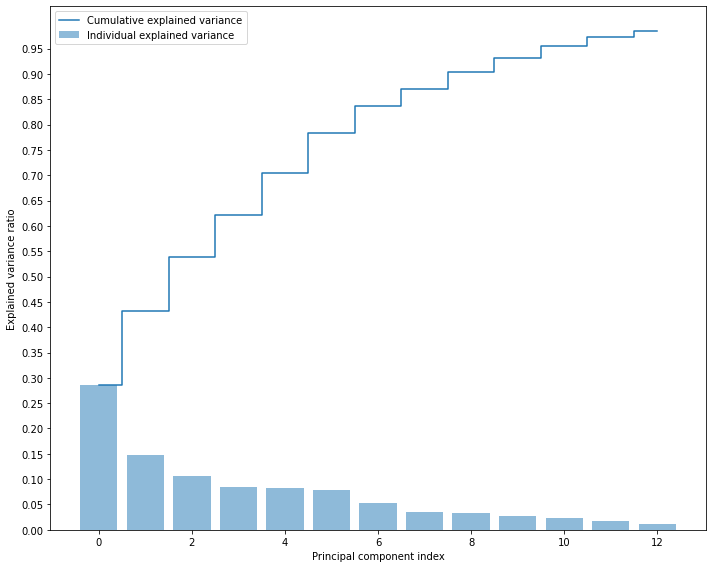

In [209]:
X_train_PCA, X_test_PCA = do_PCA(X_train_scaled,y_train, X_test_scaled,y_test,n_components = 13)


In [210]:
models, names = get_models()
X_train_PCA, X_test_PCA = do_scale(X_train_PCA, X_test_PCA, MinMaxScaler)
for i in range(len(models)):
  evaluate("None/PCA","PCA " +names[i],models[i],X_train_PCA, y_train, X_test_PCA,y_test)


Training LogisticRegression() ...
PredictingLogisticRegression() scores ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 LogisticRegression()ConfusionMatrix 
 [[66880     0]
 [ 9342     0]]


Training DecisionTreeClassifier() ...
PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[60096  6784]
 [ 6614  2728]]


Training RandomForestClassifier() ...
PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[63323  3557]
 [ 7655  1687]]


Training GradientBoostingClassifier() ...
PredictingGradientBoostingClassifier() scores ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 GradientBoostingClassifier()ConfusionMatrix 
 [[66880     0]
 [ 9342     0]]


Training BaggingClassifier() ...
PredictingBaggingClassifier() scores ...


 BaggingClassifier()ConfusionMatrix 
 [[63626  3254]
 [ 7807  1535]]


Training GaussianNB() ...
PredictingGaussianNB() scores ...


 GaussianNB()ConfusionMatrix 
 [[51042 15838]
 [ 2756  6586]]


Training MultinomialNB() ...
PredictingMultinomialNB() scores ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 MultinomialNB()ConfusionMatrix 
 [[66880     0]
 [ 9342     0]]


Training BernoulliNB() ...
PredictingBernoulliNB() scores ...


 BernoulliNB()ConfusionMatrix 
 [[66880     0]
 [ 9342     0]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
display_report()

Sampling                       model_name    TP     FP     TN    FN  \
0       None               LogisticRegression     0      4  66876  9342   
1       None          DecisionTree Classifier  2837   6935  59945  6505   
2       None          RandomForest Classifier  1477   3001  63879  7865   
3       None      GradientBoosting Classifier     1      1  66879  9341   
4       None               Bagging Classifier  1329   2829  64051  8013   
5       None              Gaussian NaiveBayes  8377  20835  46045   965   
6       None                Multinomial Bayes  1525   3390  63490  7817   
7       None                  Bernoulli Bayes  7638  18968  47912  1704   
8   None/PCA           PCA LogisticRegression     0      0  66880  9342   
9   None/PCA      PCA DecisionTree Classifier  2728   6784  60096  6614   
10  None/PCA      PCA RandomForest Classifier  1687   3557  63323  7655   
11  None/PCA  PCA GradientBoosting Classifier     0      0  66880  9342   
12  None/PCA           PCA Bagging Classifier  1535   3254  63626  7807   
13  None/PCA          PCA Gaussian NaiveBayes  6586  15838  51042  2756   
14  None/PCA            PCA Multinomial Bayes     0      0  66880  9342   
15  None/PCA              PCA Bernoulli Bayes     0      0  66880  9342   

    accuracy  balanced_accuracy    recall  precision        f1      f0.5  \
0   0.877384           0.499970  0.000000   0.000000  0.000000  0.000000   
1   0.823673           0.599995  0.303682   0.290319  0.296850  0.292897   
2   0.857443           0.556616  0.158103   0.329835  0.213748  0.270969   
3   0.877437           0.500046  0.000107   0.500000  0.000214  0.000535   
4   0.857758           0.549981  0.142261   0.319625  0.196889  0.255833   
5   0.713993           0.792587  0.896703   0.286766  0.434559  0.331920   
6   0.852969           0.556277  0.163241   0.310275  0.213930  0.262913   
7   0.728792           0.766993  0.817598   0.287078  0.424947  0.329890   
8   0.877437           0.500000  0.000000   0.000000  0.000000  0.000000   
9   0.824224           0.595290  0.292015   0.286796  0.289382  0.287824   
10  0.852903           0.563699  0.180582   0.321701  0.231318  0.278218   
11  0.877437           0.500000  0.000000   0.000000  0.000000  0.000000   
12  0.854884           0.557829  0.164312   0.320526  0.217253  0.269317   
13  0.756055           0.734088  0.704988   0.293703  0.414657  0.332499   
14  0.877437           0.500000  0.000000   0.000000  0.000000  0.000000   
15  0.877437           0.500000  0.000000   0.000000  0.000000  0.000000   

        f2.0  
0   0.000000  
1   0.300912  
2   0.176480  
3   0.000134  
4   0.160020  
5   0.629093  
6   0.180333  
7   0.596961  
8   0.000000  
9   0.290956  
10  0.197949  
11  0.000000  
12  0.182058  
13  0.550743  
14  0.000000  
15  0.000000

###Performing Sampling Techniques

####OverSampling SMOTE


In [212]:
X_smote, y_smote = do_sampling(X_train_scaled, y_train, SMOTE)

In [213]:
X_smote.shape, y_smote.shape

((535038, 18), (535038,))

In [214]:
models, names = get_models()
for i in range(len(models)):
  evaluate("SMOTE Sampling", "SMOTE "+ names[i],models[i],X_smote, y_smote, X_test_scaled,y_test)



Training LogisticRegression() ...
PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[42396 24484]
 [  427  8915]]


Training DecisionTreeClassifier() ...
PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[59344  7536]
 [ 6386  2956]]


Training RandomForestClassifier() ...
PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[57874  9006]
 [ 5292  4050]]


Training GradientBoostingClassifier() ...
PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[46417 20463]
 [ 1016  8326]]


Training BaggingClassifier() ...
PredictingBaggingClassifier() scores ...


 BaggingClassifier()ConfusionMatrix 
 [[62036  4844]
 [ 7235  2107]]


Training GaussianNB() ...
PredictingGaussianNB() scores ...


 GaussianNB()ConfusionMatrix 
 [[45302 21578]
 [  829  8513]]


Training MultinomialNB() ...
PredictingMultinomialNB() scores ...


 Multinomi

In [215]:
display_report()

Sampling                         model_name    TP     FP     TN  \
0             None                 LogisticRegression     0      4  66876   
1             None            DecisionTree Classifier  2837   6935  59945   
2             None            RandomForest Classifier  1477   3001  63879   
3             None        GradientBoosting Classifier     1      1  66879   
4             None                 Bagging Classifier  1329   2829  64051   
5             None                Gaussian NaiveBayes  8377  20835  46045   
6             None                  Multinomial Bayes  1525   3390  63490   
7             None                    Bernoulli Bayes  7638  18968  47912   
8         None/PCA             PCA LogisticRegression     0      0  66880   
9         None/PCA        PCA DecisionTree Classifier  2728   6784  60096   
10        None/PCA        PCA RandomForest Classifier  1687   3557  63323   
11        None/PCA    PCA GradientBoosting Classifier     0      0  66880   
12        None/PCA             PCA Bagging Classifier  1535   3254  63626   
13        None/PCA            PCA Gaussian NaiveBayes  6586  15838  51042   
14        None/PCA              PCA Multinomial Bayes     0      0  66880   
15        None/PCA                PCA Bernoulli Bayes     0      0  66880   
16  SMOTE Sampling           SMOTE LogisticRegression  8915  24484  42396   
17  SMOTE Sampling      SMOTE DecisionTree Classifier  2956   7536  59344   
18  SMOTE Sampling      SMOTE RandomForest Classifier  4050   9006  57874   
19  SMOTE Sampling  SMOTE GradientBoosting Classifier  8326  20463  46417   
20  SMOTE Sampling           SMOTE Bagging Classifier  2107   4844  62036   
21  SMOTE Sampling          SMOTE Gaussian NaiveBayes  8513  21578  45302   
22  SMOTE Sampling            SMOTE Multinomial Bayes  8492  23353  43527   
23  SMOTE Sampling              SMOTE Bernoulli Bayes  8374  20820  46060   

      FN  accuracy  balanced_accuracy    recall  precision        f1  \
0   9342  0.877384           0.499970  0.000000   0.000000  0.000000   
1   6505  0.823673           0.599995  0.303682   0.290319  0.296850   
2   7865  0.857443           0.556616  0.158103   0.329835  0.213748   
3   9341  0.877437           0.500046  0.000107   0.500000  0.000214   
4   8013  0.857758           0.549981  0.142261   0.319625  0.196889   
5    965  0.713993           0.792587  0.896703   0.286766  0.434559   
6   7817  0.852969           0.556277  0.163241   0.310275  0.213930   
7   1704  0.728792           0.766993  0.817598   0.287078  0.424947   
8   9342  0.877437           0.500000  0.000000   0.000000  0.000000   
9   6614  0.824224           0.595290  0.292015   0.286796  0.289382   
10  7655  0.852903           0.563699  0.180582   0.321701  0.231318   
11  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
12  7807  0.854884           0.557829  0.164312   0.320526  0.217253   
13  2756  0.756055           0.734088  0.704988   0.293703  0.414657   
14  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
15  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
16   427  0.673178           0.794102  0.954292   0.266924  0.417164   
17  6386  0.817349           0.601871  0.316420   0.281738  0.298074   
18  5292  0.812416           0.649433  0.433526   0.310202  0.361639   
19  1016  0.718205           0.792639  0.891244   0.289208  0.436705   
20  7235  0.841529           0.576556  0.225541   0.303122  0.258639   
21   829  0.706030           0.794312  0.911261   0.282909  0.431770   
22   850  0.682467           0.779918  0.909013   0.266667  0.412363   
23   968  0.714151           0.792539  0.896382   0.286840  0.434607   

        f0.5      f2.0  
0   0.000000  0.000000  
1   0.292897  0.300912  
2   0.270969  0.176480  
3   0.000535  0.000134  
4   0.255833  0.160020  
5   0.331920  0.629093  
6   0.262913  0.180333  
7   0.329890  0.596961  
8   0.000000  0.000000  
9   0.287824  0.290956  
10  0.27

#### UnderSampling : Tomek Links

In [216]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

In [218]:
X_tomek, y_tomek = do_sampling(X_train_scaled, y_train, TomekLinks)

In [219]:
X_tomek.shape, y_tomek.shape

((289849, 18), (289849,))

In [220]:
models, names = get_models()
for i in range(len(models)):
  evaluate("Tomek Under Sampling", "Tomek " + names[i],models[i],X_tomek, y_tomek, X_test_scaled,y_test)



Training LogisticRegression() ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[66765   115]
 [ 9305    37]]


Training DecisionTreeClassifier() ...
PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[58721  8159]
 [ 6057  3285]]


Training RandomForestClassifier() ...
PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[62192  4688]
 [ 7076  2266]]


Training GradientBoostingClassifier() ...
PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[66708   172]
 [ 9164   178]]


Training BaggingClassifier() ...
PredictingBaggingClassifier() scores ...


 BaggingClassifier()ConfusionMatrix 
 [[62648  4232]
 [ 7371  1971]]


Training GaussianNB() ...
PredictingGaussianNB() scores ...


 GaussianNB()ConfusionMatrix 
 [[46038 20842]
 [  965  8377]]


Training MultinomialNB() ...
PredictingMultinomialNB() scores ...


 MultinomialNB()ConfusionMatrix 
 [[59916  69

In [221]:
display_report()

Sampling                         model_name    TP     FP  \
0                   None                 LogisticRegression     0      4   
1                   None            DecisionTree Classifier  2837   6935   
2                   None            RandomForest Classifier  1477   3001   
3                   None        GradientBoosting Classifier     1      1   
4                   None                 Bagging Classifier  1329   2829   
5                   None                Gaussian NaiveBayes  8377  20835   
6                   None                  Multinomial Bayes  1525   3390   
7                   None                    Bernoulli Bayes  7638  18968   
8               None/PCA             PCA LogisticRegression     0      0   
9               None/PCA        PCA DecisionTree Classifier  2728   6784   
10              None/PCA        PCA RandomForest Classifier  1687   3557   
11              None/PCA    PCA GradientBoosting Classifier     0      0   
12              None/PCA             PCA Bagging Classifier  1535   3254   
13              None/PCA            PCA Gaussian NaiveBayes  6586  15838   
14              None/PCA              PCA Multinomial Bayes     0      0   
15              None/PCA                PCA Bernoulli Bayes     0      0   
16        SMOTE Sampling           SMOTE LogisticRegression  8915  24484   
17        SMOTE Sampling      SMOTE DecisionTree Classifier  2956   7536   
18        SMOTE Sampling      SMOTE RandomForest Classifier  4050   9006   
19        SMOTE Sampling  SMOTE GradientBoosting Classifier  8326  20463   
20        SMOTE Sampling           SMOTE Bagging Classifier  2107   4844   
21        SMOTE Sampling          SMOTE Gaussian NaiveBayes  8513  21578   
22        SMOTE Sampling            SMOTE Multinomial Bayes  8492  23353   
23        SMOTE Sampling              SMOTE Bernoulli Bayes  8374  20820   
24  Tomek Under Sampling            TomekLogisticRegression    37    115   
25  Tomek Under Sampling       TomekDecisionTree Classifier  3285   8159   
26  Tomek Under Sampling       TomekRandomForest Classifier  2266   4688   
27  Tomek Under Sampling   TomekGradientBoosting Classifier   178    172   
28  Tomek Under Sampling            TomekBagging Classifier  1971   4232   
29  Tomek Under Sampling           TomekGaussian NaiveBayes  8377  20842   
30  Tomek Under Sampling             TomekMultinomial Bayes  3077   6964   
31  Tomek Under Sampling               TomekBernoulli Bayes  7910  19617   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
0   66876  9342  0.877384           0.499970  0.000000   0.000000  0.000000   
1   59945  6505  0.823673           0.599995  0.303682   0.290319  0.296850   
2   63879  7865  0.857443           0.556616  0.158103   0.329835  0.213748   
3   66879  9341  0.877437           0.500046  0.000107   0.500000  0.000214   
4   64051  8013  0.857758           0.549981  0.142261   0.319625  0.196889   
5   46045   965  0.713993           0.792587  0.896703   0.286766  0.434559   
6   63490  7817  0.852969           0.556277  0.163241   0.310275  0.213930   
7   47912  1704  0.728792           0.766993  0.817598   0.287078  0.424947   
8   66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
9   60096  6614  0.824224           0.595290  0.292015   0.286796  0.289382   
10  63323  7655  0.852903           0.563699  0.180582   0.321701  0.231318   
11  66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
12  63626  7807  0.854884           0.557829  0.164312   0.320526  0.217253   
13  51042  2756  0.756055           0.734088  0.704988   0.293703  0.414657   
14  66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
15  66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
16  42396   427  0.673178           0.794102  0.954292   0.266924  0.417164   
17  59344  6386  0.817349           0.601871  0.316420   0.281738  0.298074   
18  57

#### Combination of Undersampling and oversampling

In [222]:
X_SMOTEENN, y_SMOTEENN = do_sampling(X_train_scaled, y_train, SMOTEENN)

In [223]:
X_SMOTEENN.shape, y_SMOTEENN.shape

((404686, 18), (404686,))

In [224]:
models, names = get_models()

for i in range(len(models)):
  evaluate("SMOTEENN Sampling", "SMOTEENN" + names[i],models[i],X_SMOTEENN, y_SMOTEENN, X_test_scaled, y_test)



Training LogisticRegression() ...
PredictingLogisticRegression() scores ...


 LogisticRegression()ConfusionMatrix 
 [[41632 25248]
 [  333  9009]]


Training DecisionTreeClassifier() ...
PredictingDecisionTreeClassifier() scores ...


 DecisionTreeClassifier()ConfusionMatrix 
 [[53206 13674]
 [ 3668  5674]]


Training RandomForestClassifier() ...
PredictingRandomForestClassifier() scores ...


 RandomForestClassifier()ConfusionMatrix 
 [[49638 17242]
 [ 2067  7275]]


Training GradientBoostingClassifier() ...
PredictingGradientBoostingClassifier() scores ...


 GradientBoostingClassifier()ConfusionMatrix 
 [[43844 23036]
 [  623  8719]]


Training BaggingClassifier() ...
PredictingBaggingClassifier() scores ...


 BaggingClassifier()ConfusionMatrix 
 [[53980 12900]
 [ 3564  5778]]


Training GaussianNB() ...
PredictingGaussianNB() scores ...


 GaussianNB()ConfusionMatrix 
 [[44937 21943]
 [  744  8598]]


Training MultinomialNB() ...
PredictingMultinomialNB() scores ...


 Multinomi

In [ ]:
display_report()

In [226]:
display_report()

Sampling                           model_name    TP     FP  \
0                   None                   LogisticRegression     0      4   
1                   None              DecisionTree Classifier  2837   6935   
2                   None              RandomForest Classifier  1477   3001   
3                   None          GradientBoosting Classifier     1      1   
4                   None                   Bagging Classifier  1329   2829   
5                   None                  Gaussian NaiveBayes  8377  20835   
6                   None                    Multinomial Bayes  1525   3390   
7                   None                      Bernoulli Bayes  7638  18968   
8               None/PCA               PCA LogisticRegression     0      0   
9               None/PCA          PCA DecisionTree Classifier  2728   6784   
10              None/PCA          PCA RandomForest Classifier  1687   3557   
11              None/PCA      PCA GradientBoosting Classifier     0      0   
12              None/PCA               PCA Bagging Classifier  1535   3254   
13              None/PCA              PCA Gaussian NaiveBayes  6586  15838   
14              None/PCA                PCA Multinomial Bayes     0      0   
15              None/PCA                  PCA Bernoulli Bayes     0      0   
16        SMOTE Sampling             SMOTE LogisticRegression  8915  24484   
17        SMOTE Sampling        SMOTE DecisionTree Classifier  2956   7536   
18        SMOTE Sampling        SMOTE RandomForest Classifier  4050   9006   
19        SMOTE Sampling    SMOTE GradientBoosting Classifier  8326  20463   
20        SMOTE Sampling             SMOTE Bagging Classifier  2107   4844   
21        SMOTE Sampling            SMOTE Gaussian NaiveBayes  8513  21578   
22        SMOTE Sampling              SMOTE Multinomial Bayes  8492  23353   
23        SMOTE Sampling                SMOTE Bernoulli Bayes  8374  20820   
24  Tomek Under Sampling              TomekLogisticRegression    37    115   
25  Tomek Under Sampling         TomekDecisionTree Classifier  3285   8159   
26  Tomek Under Sampling         TomekRandomForest Classifier  2266   4688   
27  Tomek Under Sampling     TomekGradientBoosting Classifier   178    172   
28  Tomek Under Sampling              TomekBagging Classifier  1971   4232   
29  Tomek Under Sampling             TomekGaussian NaiveBayes  8377  20842   
30  Tomek Under Sampling               TomekMultinomial Bayes  3077   6964   
31  Tomek Under Sampling                 TomekBernoulli Bayes  7910  19617   
32     SMOTEENN Sampling           SMOTEENNLogisticRegression  9009  25248   
33     SMOTEENN Sampling      SMOTEENNDecisionTree Classifier  5674  13674   
34     SMOTEENN Sampling      SMOTEENNRandomForest Classifier  7275  17242   
35     SMOTEENN Sampling  SMOTEENNGradientBoosting Classifier  8719  23036   
36     SMOTEENN Sampling           SMOTEENNBagging Classifier  5778  12900   
37     SMOTEENN Sampling          SMOTEENNGaussian NaiveBayes  8598  21943   
38     SMOTEENN Sampling            SMOTEENNMultinomial Bayes  8558  23692   
39     SMOTEENN Sampling              SMOTEENNBernoulli Bayes  8519  22222   

       TN    FN  accuracy  balanced_accuracy    recall  precision        f1  \
0   66876  9342  0.877384           0.499970  0.000000   0.000000  0.000000   
1   59945  6505  0.823673           0.599995  0.303682   0.290319  0.296850   
2   63879  7865  0.857443           0.556616  0.158103   0.329835  0.213748   
3   66879  9341  0.877437           0.500046  0.000107   0.500000  0.000214   
4   64051  8013  0.857758           0.549981  0.142261   0.319625  0.196889   
5   46045   965  0.713993           0.792587  0.896703   0.286766  0.434559   
6   63490  7817  0.852969           0.556277  0.163241   0.310275  0.213930   
7   47912  1704  0.728792           0.766993  0.817598   0.287078  0.424947   
8   66880  9342  0.877437           0.500000  0.000000   0.000000  0.000000   
9   60096  6614  0.824224  

In [228]:
display_report().to_csv('Final_Report.csv')